In [1]:
%run Data_Science_Preprocessing.ipynb

2020-11-08 16:15:20 [scrapy.utils.log] INFO: Scrapy 2.3.0 started (bot: scrapybot)
2020-11-08 16:15:20 [scrapy.utils.log] INFO: Versions: lxml 4.5.2.0, libxml2 2.9.10, cssselect 1.1.0, parsel 1.5.2, w3lib 1.21.0, Twisted 20.3.0, Python 3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)], pyOpenSSL 19.1.0 (OpenSSL 1.1.1h  22 Sep 2020), cryptography 3.1.1, Platform Windows-10-10.0.19041-SP0
2020-11-08 16:15:20 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor


In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

2020-11-08 16:17:53 [matplotlib.pyplot] DEBUG: Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [3]:
durchwachstumfnl.describe()

,AGR
count,16.000000
mean,0.579076
std,0.016052
min,0.551415
25%,0.572381
50%,0.575824
75%,0.584021
max,0.621805


Durchwachstumfnl sind die prognostizierten durchschnittlichen täglichen Wachstumsraten aller deutschen Bundesländer. Prognosen wurden mithilfe von erhobenen Daten bis zum 30.06 berechnet.

In [4]:
compLK.describe()

,AGR,AGR_D,Bev.D.Ew./km²
count,280.000000,280.000000,280.000000
mean,9.658100,12.272411,341.725000
std,16.102230,72.953839,431.041806
min,2.245455,-0.450450,39.000000
25%,5.321871,1.963652,109.750000
50%,6.408620,3.071789,169.000000
75%,7.517026,4.179298,339.250000
max,152.113099,1131.448160,2954.000000


compLK sind die durchschnittlichen täglichen Wachstumsraten deutscher Landkreis und die Bevölkerungsdichte jedes deutschen Landkreises. 

In [5]:
DFCounty[['AGR','Density']].describe()

,AGR,Density
count,1607.000000,1607.000000
mean,3.683416,91.152116
std,1.786995,596.305345
min,0.333333,0.196519
25%,2.436664,6.526914
50%,3.499712,17.148318
75%,4.665372,45.521004
max,16.825131,18671.140601


DFCounty sind die durchschnittlichen täglichen Wachstumsraten us-amerikanischer Counties. Sie sind mit deutschen Landkreisen vergleichbar. Außerdem wurd noch dieBevölkerungsdichte mit Daten von 2010 erhoben. Da es in den USA keine Einwohnermeldeämter gibt machen sie alle 10 Jahre eine Volkszählung. Die letzte Volkszählung war 2010. 

Über d[] lassen sich deutsche Landkreise aufrufen. Dort findet man Daten zu täglichen Neuinfektionen und Toden und deren tägliche Veränderung. Damit wurde compLK berechnet.

In [6]:
dic['Albany County'].describe()

,cases,dailycases,Rate
count,150.000000,150.000000,150.000000
mean,707.613333,13.660000,6.408761
std,776.322209,17.232259,19.794056
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,312.000000,9.000000,0.767365
75%,1490.250000,20.000000,4.137996
max,2049.000000,98.000000,150.000000


Über dic[] lassen sich amerikanische Counties aufrufen. Dort findet man Daten zu täglichen Neuinfektionen und deren tägliche Veränderung. Damit wurde DFCounty berechnet.

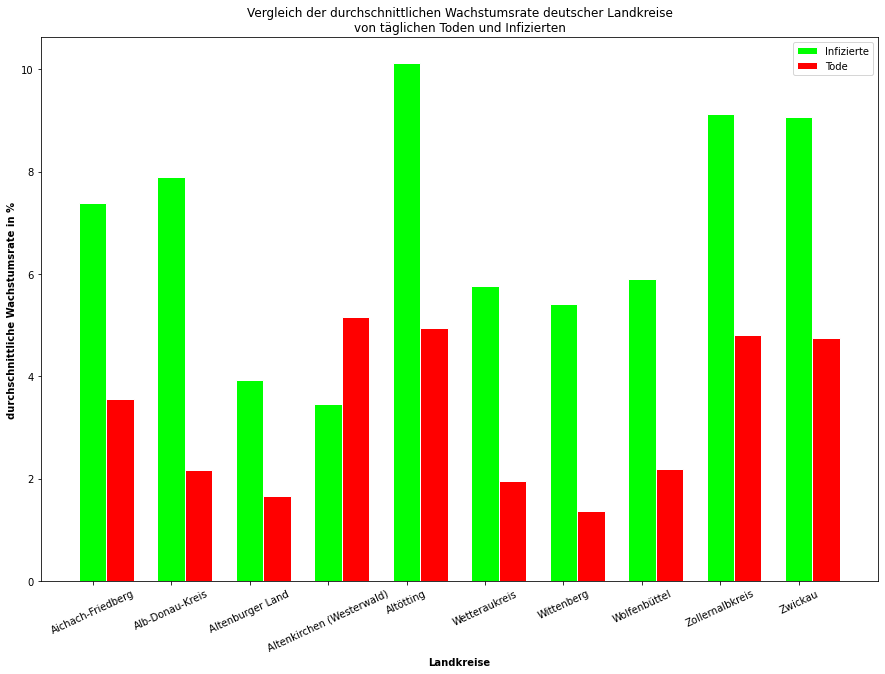

In [38]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
compLKbar = pd.DataFrame()
compLK = compLK.loc[compLK['Landkreise/Kreis'] != 'Würzburg']
compLKbar = compLK.iloc[:5]
compLKbar = compLKbar.append(compLK.tail(5))
#compLKbar.plot(kind='bar', x = 'Landkreise/Kreis', y= 'AGR', ax=ax,label='durchschnittliche Wachstumsrate')

labels = compLKbar['Landkreise/Kreis']
width = 0.35  # the width of the bars
bars1 = compLKbar['AGR']
bars2 = compLKbar['AGR_D']
 
# Set position of bar on X axis
r1 = np.arange(len(labels))
r2 = [x + 0.35 for x in r1]

plt.bar(r1, bars1, color='#00ff00', width=0.35, edgecolor='white', label='Infizierte')
plt.bar(r2, bars2, color='#ff0000', width=0.35, edgecolor='white', label='Tode')

plt.title('Vergleich der durchschnittlichen Wachstumsrate deutscher Landkreise\nvon täglichen Toden und Infizierten')
plt.xlabel('Landkreise', fontweight='bold')
plt.ylabel('durchschnittliche Wachstumsrate in %', fontweight='bold')
ax.set_xticklabels(labels)
ax.set_xticks(r1)
plt.xticks(rotation = 25)

plt.legend()
plt.show()

Wie man sehen kann haben die meisten Landkreise hatten die meisten Landkreise bis ende Juni durchschnittlich täglich 10% mehr Coronafälle. Es gibt zwar auch Ausreißer, wie zum Beispiel Wittenberg.

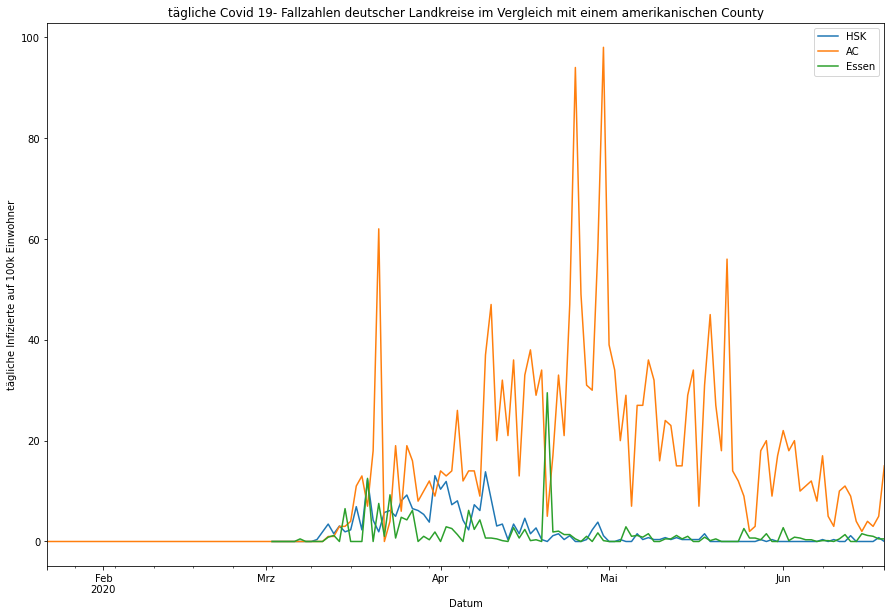

In [8]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
d['Hochsauerlandkreis'].plot(kind='line', x = 'publication_datetime', y= 'dailycases', ax=ax, label="HSK")
dic['Albany County'].plot(kind='line', x = 'date', y= 'dailycases', ax=ax, label="AC")
d['Essen'].plot(kind='line', x = 'publication_datetime', y= 'dailycases', ax=ax, label="Essen")
ax.set_title('tägliche Covid 19- Fallzahlen deutscher Landkreise im Vergleich mit einem amerikanischen County')
ax.set_xlabel('Datum')
ax.set_ylabel('tägliche Infizierte auf 100k Einwohner')

plt.show()

Man kann sehen, dass die Daten erst ab mitte März wirklich brauchbar sind, da vorher der Virus auch noch nicht in den westlichen Staaten vorhanden war

Text(0, 0.5, 'tägliche Todeszahlen deutscher Landkreise')

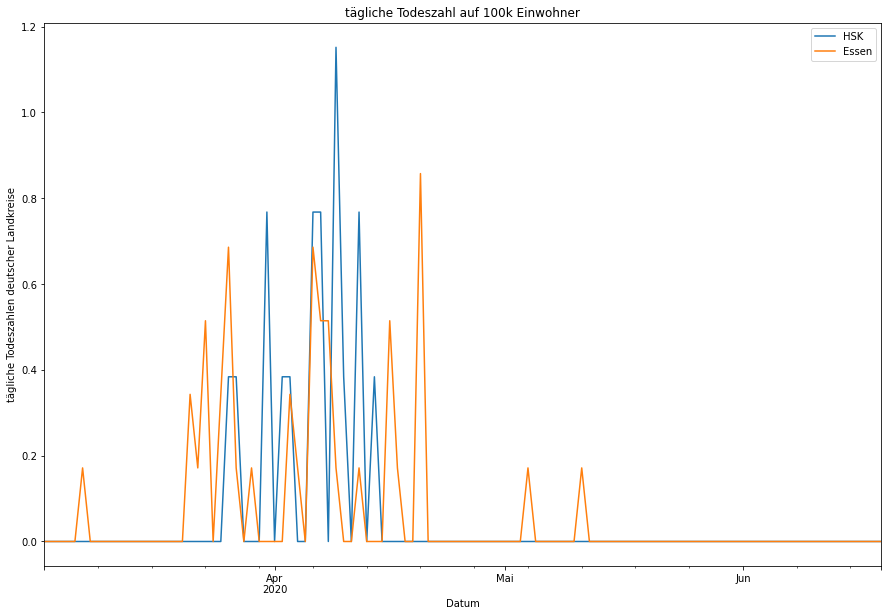

In [9]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
d['Hochsauerlandkreis'].plot(kind='line', x = 'publication_datetime', y= 'dailydeaths', ax=ax, label="HSK")
d['Essen'].plot(kind='line', x = 'publication_datetime', y= 'dailydeaths', ax=ax, label="Essen")

ax.set_title('tägliche Todeszahl auf 100k Einwohner')
ax.set_xlabel('Datum')
ax.set_ylabel('tägliche Todeszahlen deutscher Landkreise')

(-0.6910449999999998, 50.0)

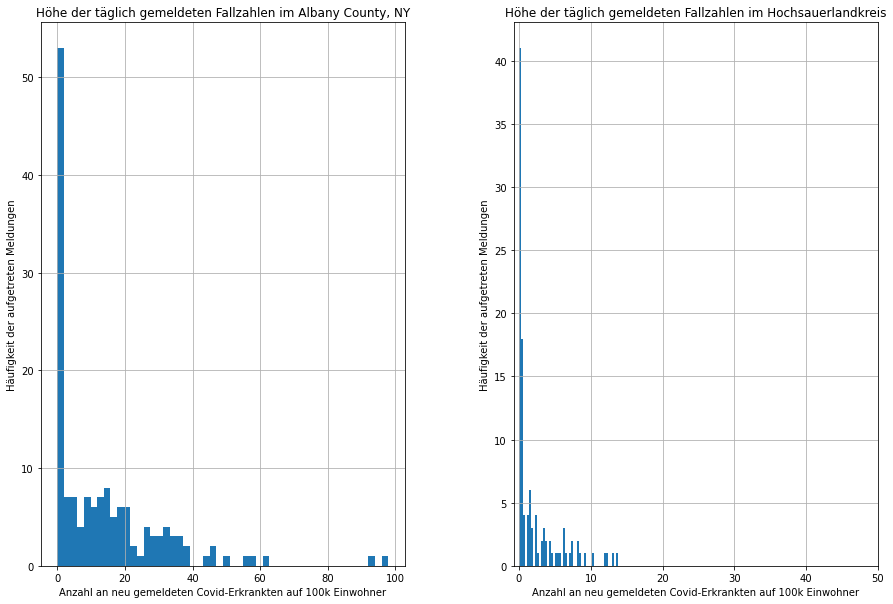

In [10]:
fig, ax = plt.subplots(1, 2,figsize = (15, 10))

dic['Albany County'].hist('dailycases', bins=50, ax=ax[0])
ax[0].set_xlabel('Anzahl an neu gemeldeten Covid-Erkrankten auf 100k Einwohner')
ax[0].set_ylabel('Häufigkeit der aufgetreten Meldungen')
ax[0].set_title('Höhe der täglich gemeldeten Fallzahlen im Albany County, NY')

d['Hochsauerlandkreis'].hist('dailycases', bins=50, ax=ax[1])
ax[1].set_xlabel('Anzahl an neu gemeldeten Covid-Erkrankten auf 100k Einwohner')
ax[1].set_ylabel('Häufigkeit der aufgetreten Meldungen')
ax[1].set_title('Höhe der täglich gemeldeten Fallzahlen im Hochsauerlandkreis')
ax[1].set_xlim(right = 50)

Zeigt an dass die meisten täglichen Meldungen Meldungen eine sehr geringe Anzahl an neue Infizierten hatten.
Hat nicht so geklappt wie es sollte. (Sollte Zusammenhang zwischen gemeldeten Wochentag und der höhe der Infektionszahlen zeigen).
Außerdem zeigt der Vergleich, dass im Albany County täglich höhere neue Fallzahlen gemeldet wurden als im HSK. Wobei es im HSK Maximal zu Tagen mit 15 neuen Fällen kam gibt es im Albany County schon Tage an denen bis zu 40 neue Infizierte gemeldet wurden.

2020-11-08 16:16:56 [matplotlib.category] INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-11-08 16:16:56 [matplotlib.category] INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-11-08 16:16:56 [matplotlib.category] INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-11-08 16:16:56 [matplotlib.category] INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0.5, 1.0, 'Verbindung zwischen Tag und Höhe der Meldungen')

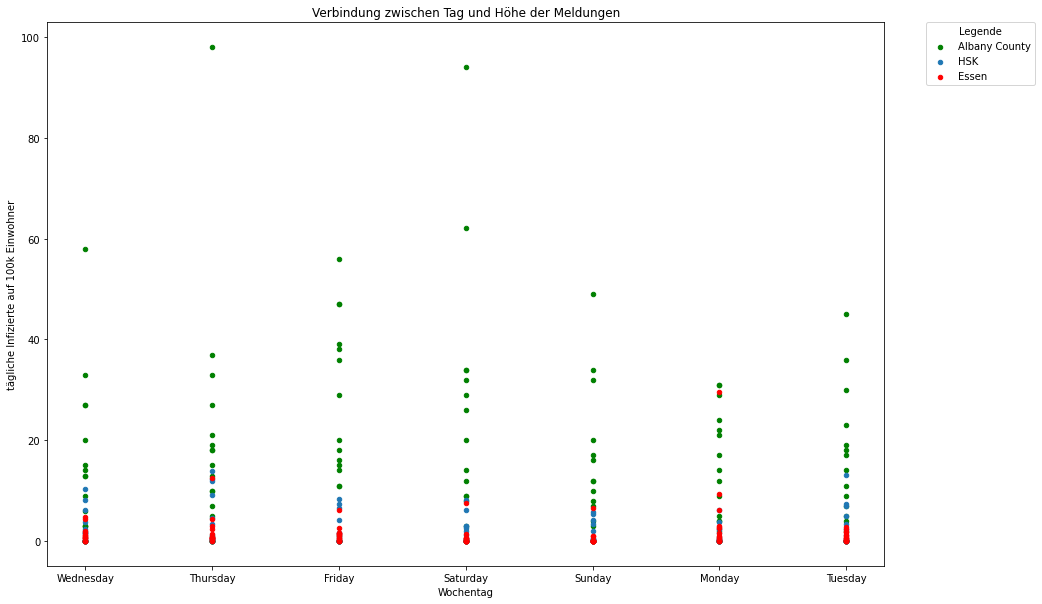

In [12]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
dic['Albany County'].plot(kind='scatter', x = 'Weekday', y= 'dailycases', ax=ax, label="Albany County", color = 'green')
d['Hochsauerlandkreis'].plot(kind='scatter', x = 'Wochentag', y= 'dailycases', ax=ax, label="HSK")
d['Essen'].plot(kind='scatter', x = 'Wochentag', y= 'dailycases', ax=ax, label="Essen", color = 'red')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Legende") 
ax.set_xlabel('Wochentag')
ax.set_ylabel('tägliche Infizierte auf 100k Einwohner')
ax.set_title('Verbindung zwischen Tag und Höhe der Meldungen')

Zeigt das an was eigentlich das Histogramm nachweisen sollte. Man sieht dass kein Zusammenhang zwischen dem Wochentag und der höhe der Meldung besteht

In [13]:
import statsmodels.formula.api as smf

In [14]:
y = np.asarray(bundzuwachsraw_1['Gesamt'])
X = bundzuwachsraw_1[['datef']]

lmges = smf.ols(formula='Gesamt ~ datef', data=bundzuwachsraw_1).fit()
predges = lmges.predict(bundzuwachsraw_2['datef'])
bundzuwachsraw_2['predictiongesamt'] = predges

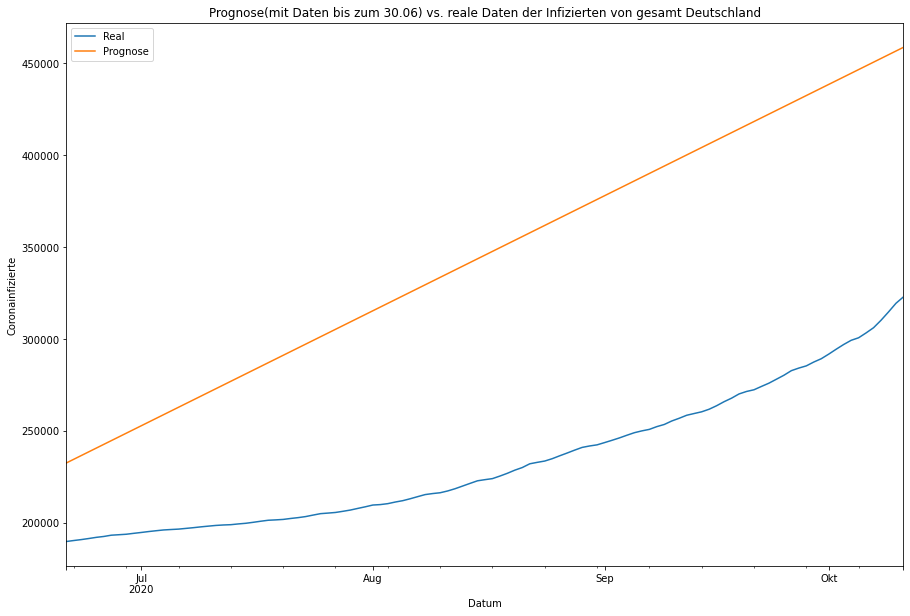

In [15]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
bundzuwachsraw_2.plot(kind='line', x = 'date', y= 'Gesamt', ax=ax, label="Real")
bundzuwachsraw_2.plot(kind='line', x = 'date', y= 'predictiongesamt', ax=ax, label="Prognose")
ax.set_title('Prognose(mit Daten bis zum 30.06) vs. reale Daten der Infizierten von gesamt Deutschland')
ax.set_xlabel('Datum')
ax.set_ylabel('Coronainfizierte')
plt.show()

Man kann sehr gut sehen, dass die realen Daten unter der Prognose liegen, somit kann man sagen, dass es in Deutschland keine exponentielle Steigung der Coronainfizierten gab.

2020-11-08 16:16:57 [fiona.env] DEBUG: Entering env context: <fiona.env.Env object at 0x000002135ABCEE88>
2020-11-08 16:16:57 [fiona.env] DEBUG: Starting outermost env
2020-11-08 16:16:57 [fiona.env] DEBUG: No GDAL environment exists
2020-11-08 16:16:57 [fiona.env] DEBUG: New GDAL environment <fiona._env.GDALEnv object at 0x000002135ADD3408> created
2020-11-08 16:16:57 [fiona._env] DEBUG: Logging error handler pushed.
2020-11-08 16:16:57 [fiona._env] DEBUG: All drivers registered.
2020-11-08 16:16:57 [fiona._env] DEBUG: GDAL_DATA found in environment: 'C:\\Users\\julia\\anaconda3\\envs\\Data Science\\Library\\share\\gdal'.
2020-11-08 16:16:57 [fiona._env] DEBUG: PROJ_LIB found in environment: 'C:\\Users\\julia\\anaconda3\\envs\\Data Science\\Library\\share\\proj'.
2020-11-08 16:16:57 [fiona._env] DEBUG: Started GDALEnv <fiona._env.GDALEnv object at 0x000002135ADD3408>.
2020-11-08 16:16:57 [fiona.env] DEBUG: Updated existing <fiona._env.GDALEnv object at 0x000002135ADD3408> with options

2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.71215
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.71215
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.71215
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: 

2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEO.TTF) oblique normal 400 normal>) = 11.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Footlight MT Light' (FTLTLT.TTF) normal normal 300 normal>) = 10.33215
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Gill Sans Ultra Bold Condensed' (GILLUBCD.TTF) normal normal 400 condensed>) = 10.627149999999999
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'DamageLog' (DamageLog.otf) normal normal 400 normal>) = 10.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Rage Italic' (RAGE.TTF) italic normal 400 normal>) = 11.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Gill Sans MT Condensed' (GILC____.TTF) normal normal 400 condensed>) = 10.627149999999999
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Perpet

2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Yu Gothic' (YuGothL.ttc) normal normal 300 normal>) = 10.33215
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Franklin Gothic Demi' (FRADM.TTF) normal normal 400 normal>) = 10.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'MS Gothic' (msgothic.ttc) normal normal 400 normal>) = 10.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Berlin Sans FB' (BRLNSB.TTF) normal normal 700 normal>) = 10.71215
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Baskerville Old Face' (BASKVILL.TTF) normal normal 400 normal>) = 10.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Engravers MT' (ENGR.TTF) normal normal 500 normal>) = 10.52215
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe MDL2 Assets' (segmdl2.ttf) normal normal 400 normal>) = 10

2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Book Antiqua' (ANTQUABI.TTF) italic normal 700 normal>) = 11.71215
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Viner Hand ITC' (VINERITC.TTF) normal normal 400 normal>) = 10.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Georgia' (georgiaz.ttf) italic normal 700 normal>) = 11.71215
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Tw Cen MT' (TCMI____.TTF) italic normal 400 normal>) = 11.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'French Script MT' (FRSCRIPT.TTF) normal normal 400 normal>) = 10.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe UI' (seguili.ttf) italic normal 300 normal>) = 11.33215
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Calisto MT' (CALISTI.TTF) italic normal 400 normal>) = 11.42715
2020-11-0

2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Jokerman' (JOKERMAN.TTF) normal normal 400 normal>) = 10.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Kievit Offc Pro' (KievitOffcPro.ttf) normal normal 400 normal>) = 10.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Fax' (LFAX.TTF) normal normal 400 normal>) = 10.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bodoni MT' (BOD_BLAI.TTF) italic normal 900 normal>) = 11.90215
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bodoni MT' (BOD_CB.TTF) normal normal 700 condensed>) = 10.912149999999999
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Californian FB' (CALIFI.TTF) italic normal 400 normal>) = 11.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe UI' (segoeui.ttf) normal normal 400 normal>) = 10.42715
2

2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Arial' (ARIALN.TTF) normal normal 400 condensed>) = 6.990786363636364
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Microsoft PhagsPa' (phagspab.ttf) normal normal 700 normal>) = 10.71215
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'AR BERKLEY' (ARBERKLEY.ttf) normal normal 5 normal>) = 10.0519
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Courier New' (courbi.ttf) italic normal 700 normal>) = 11.71215
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Eras Demi ITC' (ERASDEMI.TTF) normal normal 400 normal>) = 10.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Edwardian Script ITC' (ITCEDSCR.TTF) normal normal 400 normal>) = 10.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Cambria' (cambriab.ttf) normal normal 700 normal>) = 10.

2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Candara' (Candaral.ttf) normal normal 400 normal>) = 10.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Freestyle Script' (FREESCPT.TTF) normal normal 400 normal>) = 10.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Malgun Gothic' (malgunsl.ttf) normal normal 300 normal>) = 10.33215
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bodoni MT' (BOD_R.TTF) normal normal 400 normal>) = 10.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'HP Simplified' (HPSimplified_It.ttf) italic normal 400 normal>) = 11.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 5.063513636363637
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEB.TTF) normal normal 600 norma

2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Goudy Old Style' (GOUDOS.TTF) normal normal 400 normal>) = 10.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'PartnerCondensed' (partnercondensed.otf) normal normal 400 condensed>) = 10.627149999999999
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Franklin Gothic Book' (FRABK.TTF) normal normal 400 normal>) = 10.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Ink Free' (Inkfree.ttf) normal normal 400 normal>) = 10.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Malgun Gothic' (malgunsl.ttf) normal normal 300 normal>) = 10.33215
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Times New Roman' (timesi.ttf) italic normal 400 normal>) = 11.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bell MT' (BELLB.TTF) normal normal 700

2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Elephant' (ELEPHNTI.TTF) italic normal 400 normal>) = 11.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'KehoSymbol' (KehoSymbol.ttf) normal normal 400 normal>) = 10.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'AR JULIAN' (ARJULIAN.ttf) normal normal 5 normal>) = 10.0519
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe Print' (segoeprb.ttf) normal normal 700 normal>) = 10.71215
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Arial monospaced for SAP' (arimon__.ttf) normal normal 400 normal>) = 10.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Myanmar Text' (mmrtextb.ttf) normal normal 700 normal>) = 10.71215
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Microsoft New Tai Lue' (ntailu.ttf) normal normal 400 normal>) = 

2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Cambria' (cambriaz.ttf) italic normal 700 normal>) = 11.71215
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'HP Simplified' (HPSimplified_BdIt.ttf) italic normal 700 normal>) = 11.71215
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Arial' (arial.ttf) normal normal 400 normal>) = 6.7907863636363635
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'OCR A Extended' (OCRAEXT.TTF) normal normal 400 expanded>) = 10.627149999999999
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Univers Condensed' (Univers Condensed.ttf) normal normal 700 condensed>) = 10.912149999999999
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe Script' (segoesc.ttf) normal normal 400 normal>) = 10.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Sans Unicode' (

2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Microsoft PhagsPa' (phagspa.ttf) normal normal 400 normal>) = 10.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Gill Sans MT' (GILBI___.TTF) italic normal 700 normal>) = 11.71215
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Modern No. 20' (MOD20.TTF) normal normal 400 normal>) = 10.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEBO.TTF) oblique normal 600 normal>) = 11.61715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Book Antiqua' (ANTQUAI.TTF) italic normal 400 normal>) = 11.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bell MT' (BELLI.TTF) italic normal 400 normal>) = 11.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'MS Mincho' (MSMINCHO.TTF) normal normal 400 normal>) = 10.42715

2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Verdana' (verdanaz.ttf) italic normal 700 normal>) = 5.348513636363637
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Georgia' (georgia.ttf) normal normal 400 normal>) = 10.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Sans' (LSANSI.TTF) italic normal 400 normal>) = 11.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Wingdings' (wingding.ttf) normal normal 400 normal>) = 10.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Yu Gothic' (YuGothM.ttc) normal normal 500 normal>) = 10.52215
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Tw Cen MT' (TCB_____.TTF) normal normal 700 normal>) = 10.71215
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'TI-Nspire' (TI-Nspire.ttf) normal normal 400 normal>) = 10.42715
2020-11-08 16:16

2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe UI Emoji' (seguiemj.ttf) normal normal 400 normal>) = 10.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'DamageLog' (DamageLog.otf) normal normal 400 normal>) = 10.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Curlz MT' (CURLZ___.TTF) normal normal 400 normal>) = 10.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Constantia' (constan.ttf) normal normal 400 normal>) = 10.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Perpetua Titling MT' (PERTIBD.TTF) normal normal 700 normal>) = 10.71215
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Wingdings 3' (wingding3.ttf) normal normal 400 normal>) = 10.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Arial' (ARIALNBI.TTF) italic normal 700 condensed>) = 8.27578636363

2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Courier New' (courbi.ttf) italic normal 700 normal>) = 11.71215
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 7.7907863636363635
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'SAPGUI-Icons' (SAPGUI-icons.ttf) normal normal 400 normal>) = 10.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'TINspireKeysChinese' (TINspireKeysChinese.ttf) normal normal 400 normal>) = 10.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'HP Simplified' (HPSimplified_Rg.ttf) normal normal 400 normal>) = 10.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Matura MT Script Capitals' (MATURASC.TTF) normal normal 400 normal>) = 10.42715
2020-11-08 16:16:57 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Ink Free' (Inkfree.ttf) n

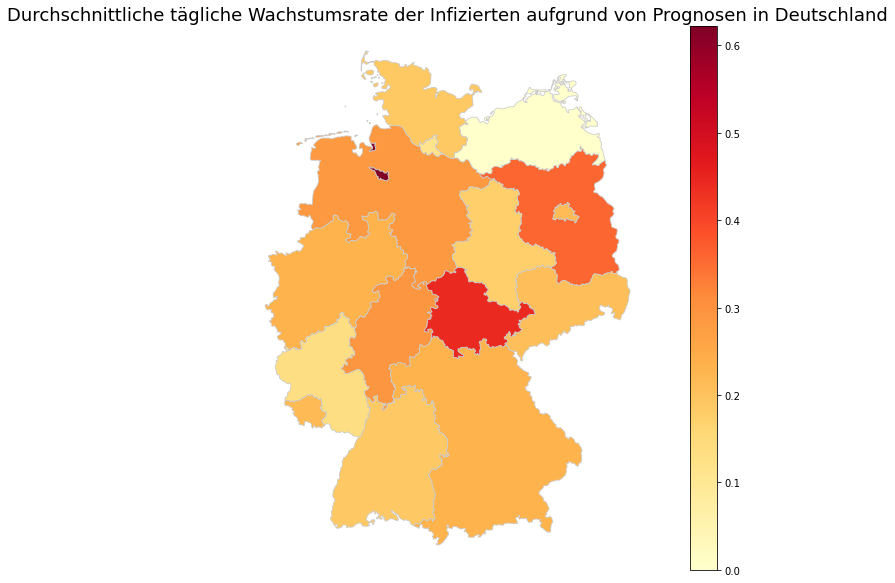

In [16]:
import geopandas as gpd

DEmap = gpd.read_file("geomap/vg2500_bld.shp")

merged = DEmap.set_index('GEN').join(durchwachstumfnl.set_index('Bundesland'))

column = durchwachstumfnl['AGR']
max_Wachstum = column.max()
vmin, vmax = 0, max_Wachstum
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

# Erstellung der Deutschlandkarte
fig, ax = plt.subplots(1, figsize=(15, 10))
merged.plot(column='AGR', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Entfernt die x und y Achse
ax.axis('off')

ax.set_title('Durchschnittliche tägliche Wachstumsrate der Infizierten aufgrund von Prognosen in Deutschland', fontdict={'fontsize': '18','fontweight' : '3'})

sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

In dieser Deutschlandkarte ist die durchschnittliche tägliche Wachstumsrate der Infizierten aufgrund von Prognosen in Deutschland für jedes Bundesland visualisiert dargestellt. Man kann sehen, dass die meisten Bundesländer eine geringe Wachstumsrate haben, jedoch Thüringen und Bremen im Vergleich sehr hohe. Die Prognosen wurden mithilfe von Linearer Regression und realen Daten, die bis zum 30.06 erhoben wurden, aufgestellt

In [17]:
lm = smf.ols('AGR ~ Dichte',data = compLKfnl).fit()
lm.params
trend = pd.DataFrame({'Dichte': [compLKfnl.Dichte.min(), compLKfnl.Dichte.max()]})
lm.predict(trend)
preds = lm.predict(trend)

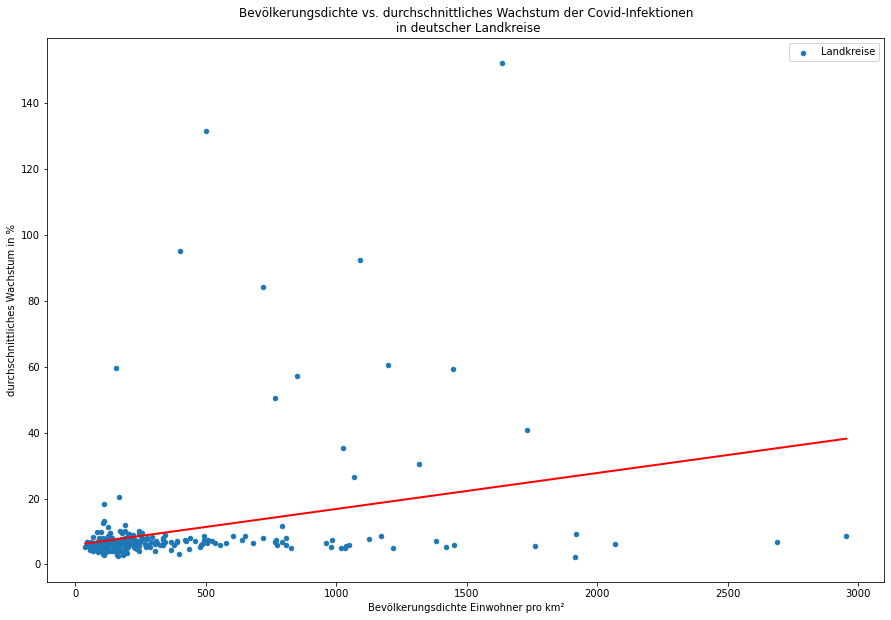

In [18]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
compLK.plot(kind='scatter', x = 'Bev.D.Ew./km²', y= 'AGR', ax=ax, label="Landkreise")
plt.plot(trend, preds, c='red', linewidth=2)

ax.set_title('Bevölkerungsdichte vs. durchschnittliches Wachstum der Covid-Infektionen\n in deutscher Landkreise')
ax.set_ylabel('durchschnittliches Wachstum in %')
_=ax.set_xlabel('Bevölkerungsdichte Einwohner pro km²')

In [19]:
print('p-Wert: \n',lm.pvalues)
compLKcorr = compLK.drop(columns=['Landkreise/Kreis'])
print('\nKorrelation: \n',compLKcorr.corr())
lm.summary()

p-Wert: 
 Intercept    8.555534e-07
Dichte       6.543334e-07
dtype: float64

Korrelation: 
                     AGR     AGR_D  Bev.D.Ew./km²
AGR            1.000000  0.494466       0.295578
AGR_D          0.494466  1.000000       0.196714
Bev.D.Ew./km²  0.295578  0.196714       1.000000


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AGR   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     25.93
Date:                 So, 08 Nov 2020   Prob (F-statistic):           6.54e-07
Time:                        16:16:58   Log-Likelihood:                -1162.4
No. Observations:                 280   AIC:                             2329.
Df Residuals:                     278   BIC:                             2336.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9295      1.177      5.036      0.000       3.612       8.247
Dichte         0.0109      0.002      5.092      0.000       0.007       0.015
==============================================================================
Omnibus:                      336.341   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16257.223
Skew:                           5.399   Prob(JB):                         0.00
Kurtosis:                      38.734   Cond. No.                         702.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In diesem Scatterplot kann man Mithilfe der Trendlinie sehen, dass es einen Zusammenhang zwischen der Bevölkerungsdichte und der durchschnittlichen Wachstumsrate der Coronainfizierungen gibt. Je höher die Bevölkerungsdichte, desto höher ist auch der durchschnittliche Wachstums. Bei einer x höheren Bevölerungsdichte würde das durchschnittliche Wachstum um 0.083846 + 0.000054x steigen. Der p-Wert ist sehr gering (0,008), das heißt dass die Beobachtungen die Hypothese, dass es einen Zusammenhang zwischen Bevölkerungsdichte und durchschnittlichen Wachstum der Coronazahlen, nicht unterstützen. Auch die Korrelation unterstützt diese Aussage

In [20]:
for j in range(10):    
    idx = DFCounty['Density'].idxmax()
    DFCounty = DFCounty.drop(idx)
    
lm2 = smf.ols('AGR ~ Density',data = DFCounty).fit()
lm2.params
trend2 = pd.DataFrame({'Density': [DFCounty.Density.min(), DFCounty.Density.max()]})
lm2.predict(trend2)
preds2 = lm2.predict(trend2)

Ab hier ist zu beachten, dass die Daten der Counties viele Ausreißer haben und damit die grafische Darstellung etwas verzerrt ist und auch das Clustering nicht richtig funktioniert.

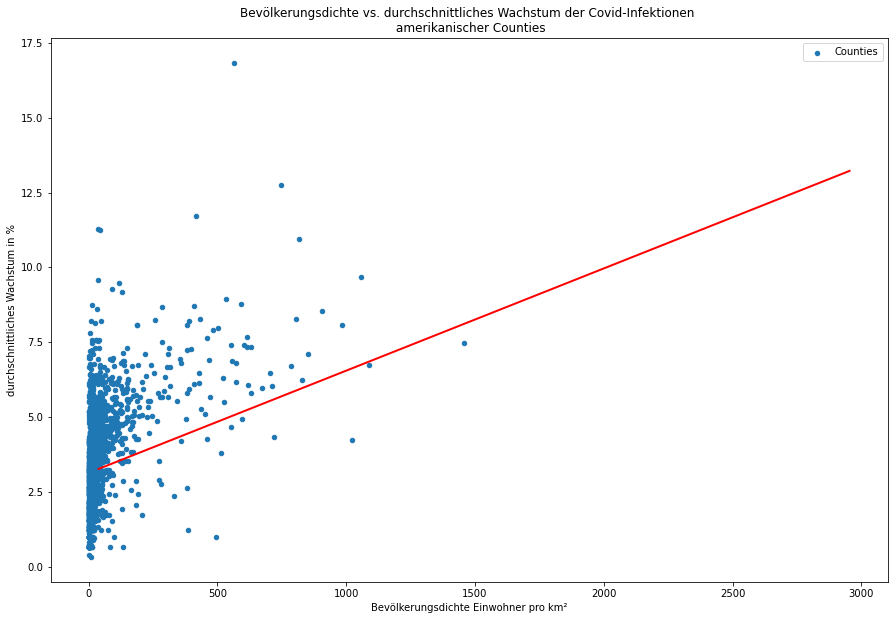

In [21]:
#Hiermit könnte man die 10 am meisten Bevölkerten Counties löschen, da sie das Streudiagramm 
# und die daurauffolgenden Analysen sehr stark bei der grafischen Darstellung beeinflussen

f, ax = plt.subplots(1, 1, figsize = (15, 10))
DFCounty.plot(kind='scatter', x = 'Density', y= 'AGR', ax=ax,label="Counties")
plt.plot(trend, preds2, c='red', linewidth=2)
ax.set_title('Bevölkerungsdichte vs. durchschnittliches Wachstum der Covid-Infektionen \n amerikanischer Counties')
ax.set_ylabel('durchschnittliches Wachstum in %')
_=ax.set_xlabel('Bevölkerungsdichte Einwohner pro km²')

In [22]:
lm2.params

Intercept    3.274893
Density      0.006821
dtype: float64

Man sieht, dass die zwei Funktionen von deutschen und amerikanischen Gebieten relativ ähnlich verlaufen, jedoch gibt es in Amerika mehr ausreißer. 

In [23]:
from sklearn.cluster import KMeans
DFCountyfnl = DFCounty.drop(columns=['County','Area','Population','State'])
km = KMeans(n_clusters=4)
km.fit(DFCountyfnl)
y_km = km.predict(DFCountyfnl)

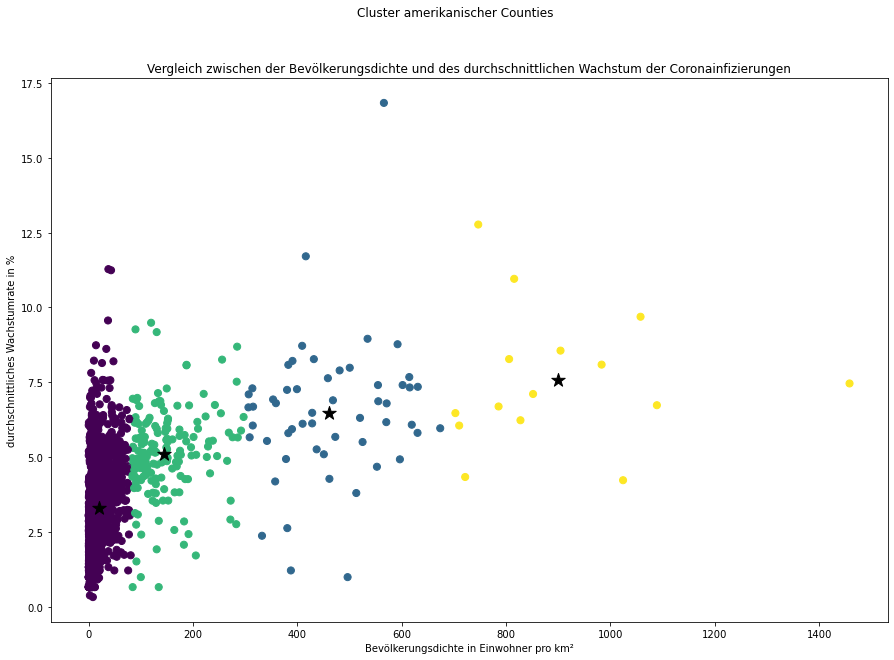

In [24]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
plt.scatter(DFCountyfnl["Density"], DFCountyfnl['AGR'], c=y_km, s=50, cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='black', marker='*',s=200, alpha=1)
plt.title("Vergleich zwischen der Bevölkerungsdichte und des durchschnittlichen Wachstum der Coronainfizierungen")
plt.suptitle("Cluster amerikanischer Counties")
plt.ylabel("durchschnittliches Wachstumrate in %")
_=plt.xlabel('Bevölkerungsdichte in Einwohner pro km²')
#_ =plt.figure(figsize=(30, 25))

Cluster des zuvor erstellen Streudiagramms mit 4 Center. Wie man sieht geben die Daten zum Clustern nicht viel her. Es entstehen keine Gruppierungen sondern, dieser Datensatz ist mehr 1 großes Cluster.

In [25]:
DFCountyState = DFCounty.loc[DFCounty['State'] == 'TX']
DFCountyState = DFCountyState.append(DFCounty.loc[DFCounty['State'] == 'CA'])
DFCountyState = DFCountyState.append(DFCounty.loc[DFCounty['State'] == 'WY'])
DFCountyState['State'] = np.where((DFCountyState.State == 'TX'),0,DFCountyState.State)
DFCountyState['State'] = np.where((DFCountyState.State == 'CA'),1,DFCountyState.State)
DFCountyState['State'] = np.where((DFCountyState.State == 'WY'),2,DFCountyState.State)
DFCountyState

,County,AGR,State,Area,Population,Density
1528,Andrews County,4.690468,0,3887.8231,18705,4.811176
1529,Angelina County,4.560089,0,2239.0809,86715,38.727944
1530,Aransas County,1.633333,0,1367.5459,23510,17.191379
1531,Archer County,1.000000,0,2397.9515,8553,3.566794
1532,Atascosa County,2.557572,0,3200.5407,51153,15.982612
...,...,...,...,...,...,...
1876,Niobrara County,0.666667,2,6806.4941,2356,0.346140
1877,Sublette County,1.555556,2,12784.1623,9831,0.768998
1878,Sweetwater County,3.033203,2,27173.5807,42343,1.558241
1879,Uinta County,3.845855,2,5407.0394,20226,3.740679


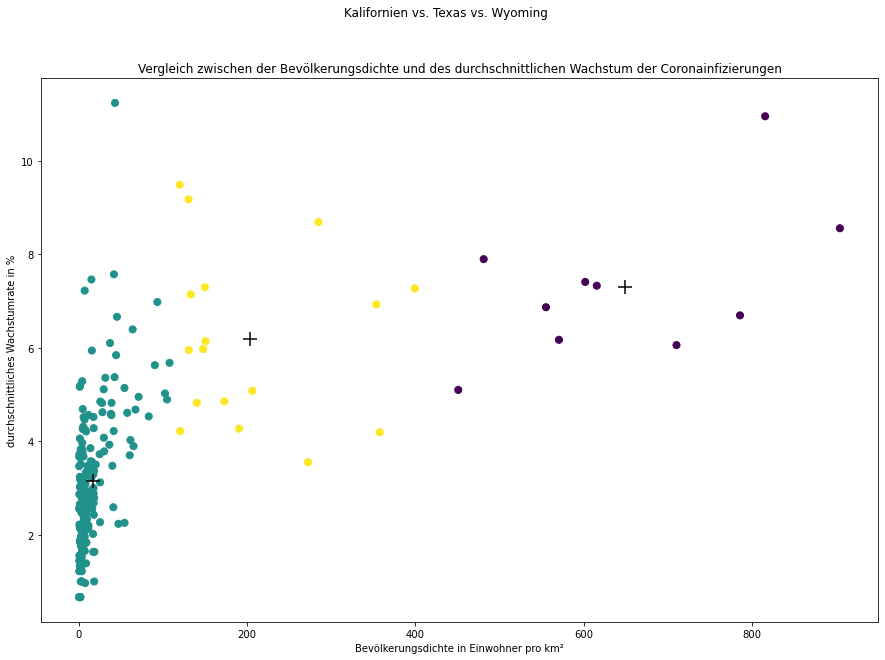

In [26]:
DFCountyfnlState = DFCountyState.drop(columns=['County','Area','Population'])
DFCountyStatefnl = DFCountyfnlState.drop(columns=['State'])
km = KMeans(n_clusters=3)
km.fit(DFCountyStatefnl)
y_km = km.predict(DFCountyStatefnl)

f, ax = plt.subplots(1, 1, figsize = (15, 10))
plt.scatter(DFCountyStatefnl["Density"], DFCountyStatefnl['AGR'], c=y_km, s=50, cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='black', marker='+',s=200, alpha=1)
plt.title("Vergleich zwischen der Bevölkerungsdichte und des durchschnittlichen Wachstum der Coronainfizierungen")
plt.suptitle("Kalifornien vs. Texas vs. Wyoming")
plt.ylabel("durchschnittliches Wachstumrate in %")
_=plt.xlabel('Bevölkerungsdichte in Einwohner pro km²')
#_ =plt.figure(figsize=(30, 25))

Hier habe ich nochmal die Counties von drei Staaten gruppiert und dann geclustered. Bei den Staaten habe ich mich für Texas, Kalifornien und Wyoming entschieden, da diese sehr unterschiedlich sínd. Jedoch bringen auch hier die Cluster keine guten Ergebnisse.

In [27]:
import mglearn as mg
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [28]:
neigh = pd.DataFrame()
DFCountyfnl = DFCountyfnl.fillna(0)
neigh = DFCountyfnl
neigh['Typ'] = 0
neigh = neigh.rename(columns={'Density':'Dichte'})
neighDE = pd.DataFrame()
neighDE = compLKfnl
neighDE['Typ'] = 1
neigh = neigh.append(neighDE)

In [29]:
y = neigh['Typ'].to_numpy()
X = neigh[['AGR','Dichte']].to_numpy()

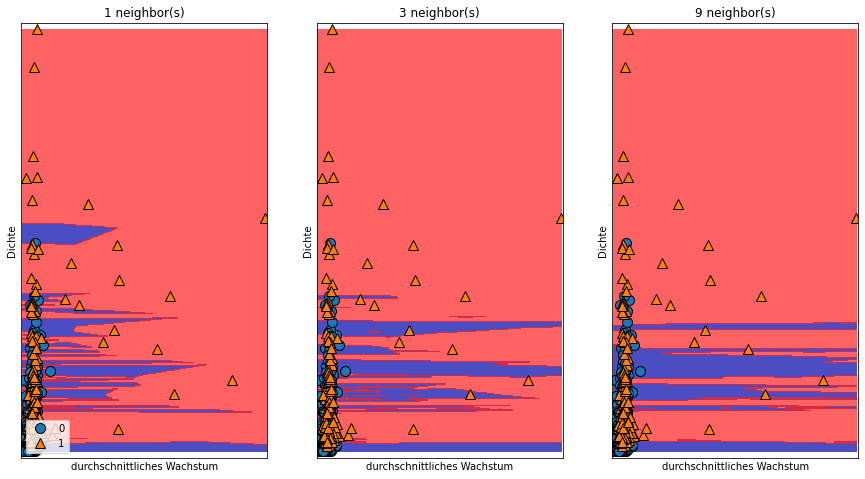

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
score = clf.score(X_test, y_test)

fig, axes = plt.subplots(1, 3, figsize=(15,8))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    
    mg.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.7)
    mg.discrete_scatter(X[:,0],X[:,1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("durchschnittliches Wachstum")
    ax.set_ylabel("Dichte")
    
axes[0].legend(loc=3)
plt.show()

In [36]:
print("Test set score: {:.5f}".format(score))

Test set score: 0.88723


Neares Neigbor Untersuchung zwischen den zwei Merkmalen Bevölerungsdichte und durchschnittliche Wachstumsrate bei amerikanischen Counties und deutschen Landkreisen. Klassen habe ich hierbei. Deutschland = 1 und Amerika = 0 gemacht. Es sollte gesagt werden, dass es mehjr amerikanische Einträge gibt. Über eine bessere Klassenunterteilung sollte man sich auch noch gedanken machen. 
Hierbei ist alles schwer zu Erkennen, da es ein paar Ausreißer gibt. Man sollte überlegen wie viele Außreißer man heraussnimmt. Wie schon bei dem Scatterplot. Auf jeden Fall kann man sehen dass es keinen erkennbaren Unterschied zwischen Landkreisen und Counties gibt.

In [32]:
from sklearn.metrics import r2_score
y = np.asarray(bundzuwachsraw_1['Gesamt'])
X = bundzuwachsraw_1[['datef']]

lmbay = smf.ols(formula='BY ~ datef', data=bundzuwachsraw_1).fit()
predbay = lmbay.predict(bundzuwachsraw_2['datef']).to_numpy()
BAY = bundzuwachsraw_2['BY'].to_numpy()

lmnw = smf.ols(formula='NW ~ datef', data=bundzuwachsraw_1).fit()
prednw = lmnw.predict(bundzuwachsraw_2['datef']).to_numpy()
NW = bundzuwachsraw_2['NW'].to_numpy()

#Bestimmtheitsmaß von Bayern und NRW
scoreby = r2_score(BAY,predbay)
scorenw = r2_score(NW,prednw)

print("Bayern: %.2f" %scoreby, ' NRW: %.2f' %scorenw)

Bayern: -21.41  NRW: -1.99


Man sieht dass die angeführten Prognosen in NRW mehr auf die Realität passen als die in Bayern, da das Bestimmtheitsmaß in NRW näher an 1 liegt als das von Bayern. Beide liegen unter den Prognosen. Das ist gut, jedoch hat Bayern laut dem Bestimmtheismaßes die Epidemie besser im Griff gehabt.

HSK:
        cases_per_100k  deaths_per_100k
count      110.000000       110.000000
mean       167.061921         4.467339
std         87.345952         2.845373
min          0.000000         0.000000
25%         95.402600         0.767800
50%        216.527500         6.526500
75%        233.035800         6.526500
max        236.491000         6.526500

Köln:
        cases_per_100k  deaths_per_100k
count      110.000000       110.000000
mean       166.995412         6.802715
std         78.902228         3.643643
min          0.736900         0.000000
25%        122.413550         3.983725
50%        206.371400         9.026700
75%        225.392000         9.303100
max        236.168800         9.579400


(-0.5618650000000002, 15.0)

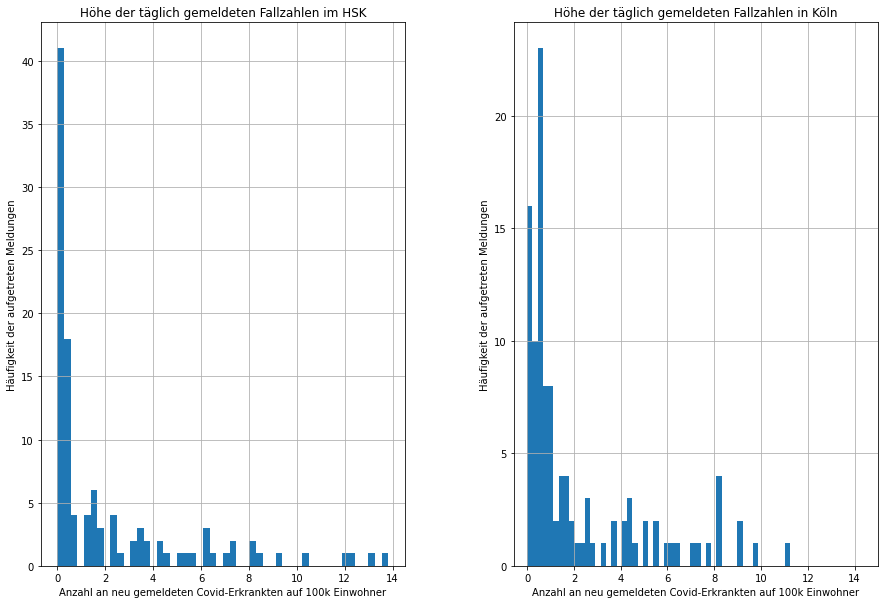

In [33]:
print("HSK:\n",d['Hochsauerlandkreis'][['cases_per_100k','deaths_per_100k']].describe())
print("\nKöln:\n",d['Köln'][['cases_per_100k','deaths_per_100k']].describe())

fig, ax = plt.subplots(1, 2,figsize = (15, 10))

d['Hochsauerlandkreis'].hist('dailycases', bins=50, ax=ax[0])
ax[0].set_xlabel('Anzahl an neu gemeldeten Covid-Erkrankten auf 100k Einwohner')
ax[0].set_ylabel('Häufigkeit der aufgetreten Meldungen')
ax[0].set_title('Höhe der täglich gemeldeten Fallzahlen im HSK')

d['Köln'].hist('dailycases', bins=50, ax=ax[1])
ax[1].set_xlabel('Anzahl an neu gemeldeten Covid-Erkrankten auf 100k Einwohner')
ax[1].set_ylabel('Häufigkeit der aufgetreten Meldungen')
ax[1].set_title('Höhe der täglich gemeldeten Fallzahlen in Köln')
ax[1].set_xlim(right = 15)

Köln und der Hochsauerlandkreis sind sich sehr ähnlich. Was man anhand der describe-Funktion und dem Histogramm sehen kann.